# Simple Polynomial Regression

### Dataset:
https://icarus.cs.weber.edu/~hvalle/cs4580/data/FuelConsumptionC02.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
df = pd.read_csv('../data/FuelConsumptionCo2.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Select some features to explore
cdf = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6
...,...,...,...,...
1062,6,3.0,271,11.8
1063,6,3.2,264,11.5
1064,6,3.0,271,11.8
1065,6,3.2,260,11.3


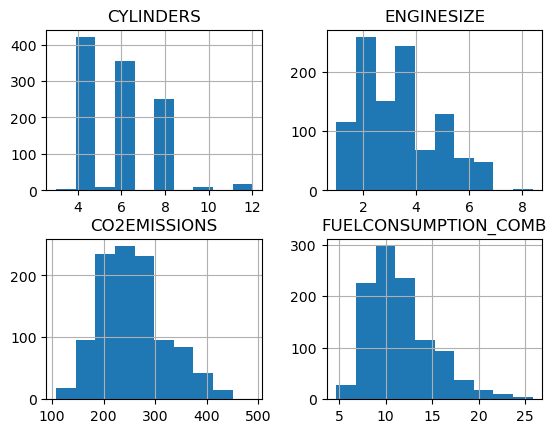

In [6]:
# Plot each feature
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Text(0, 0.5, 'CO2 Emissions')

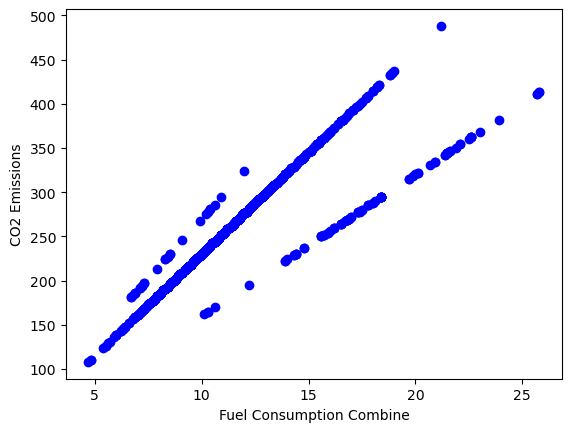

In [8]:
# Plot these features vs Emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption Combine')
plt.ylabel('CO2 Emissions')

Text(0, 0.5, 'CO2 Emissions')

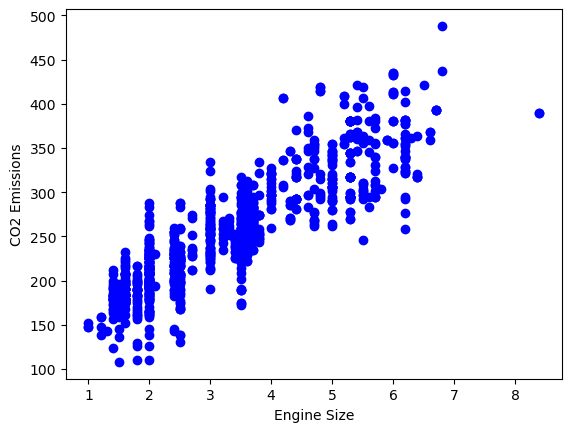

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

### Create train and test dataset
Create two sets that are mutually exclusive.  After which you will train your engine with train set, and test it with test set.

In [11]:
# Split data
msk = np.random.rand(len(df)) < 0.8 # select 80% of data
train = cdf[msk] # 80%
test = cdf[~msk] # 20%


Text(0, 0.5, 'CO2 Emissions')

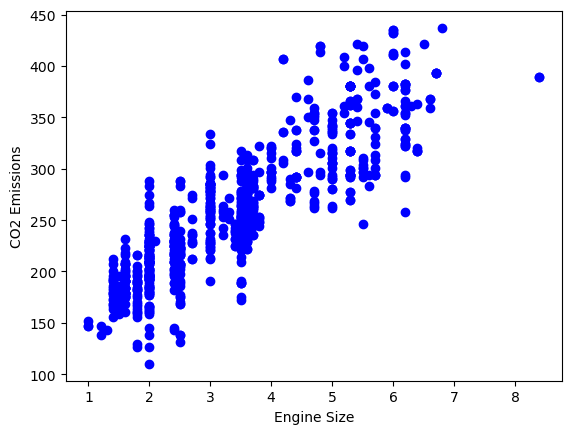

In [13]:
# See the train data distributions
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [16]:
# Model your Linear Regression on your train set
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y) # fit / train model
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficient: [[38.5620202]]
Intercept: [127.30336854]


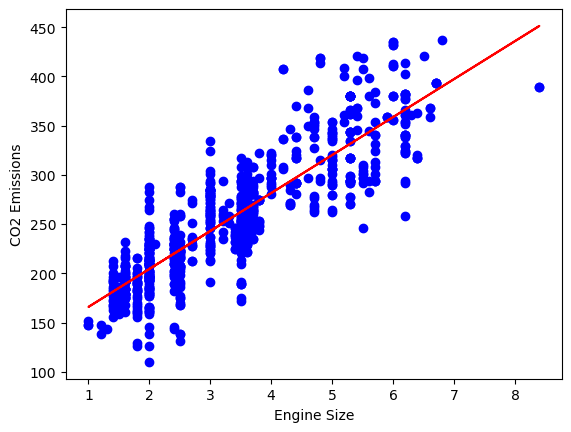

In [19]:
# See the train data distributions
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
# coef_ is 2D, intercept is 1D
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

In [22]:
# Do the evaluation:
# Mean Absolute Error, Residual Square Error, R-Square
from sklearn.metrics import r2_score
test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print(f'Mean Absolute Error: {np.mean(np.absolute(test_y_ - test_y))}')
print(f'MSE: {np.mean(test_y_ - test_y)**2}')
print(f'R2-Score: {r2_score(test_y, test_y_)}')


Mean Absolute Error: 20.874149061353897
MSE: 0.29852252036502586
R2-Score: 0.7945978308838042


### Repeat the process use FUELCONSUMPTION_COMB and CO2EMISSIONS

In [24]:
fuelcon_x_train = np.asarray(train[['FUELCONSUMPTION_COMB']])
fuelcon_y_train = np.asarray(train[['CO2EMISSIONS']])

fuel_con_regr = linear_model.LinearRegression()
fuel_con_regr.fit(fuelcon_x_train, fuelcon_y_train)
print(f'Coefficient: {fuel_con_regr.coef_}')
print(f'Intercept: {fuel_con_regr.intercept_}')

Coefficient: [[16.20857861]]
Intercept: [69.04354723]


Text(0, 0.5, 'CO2 Emissions')

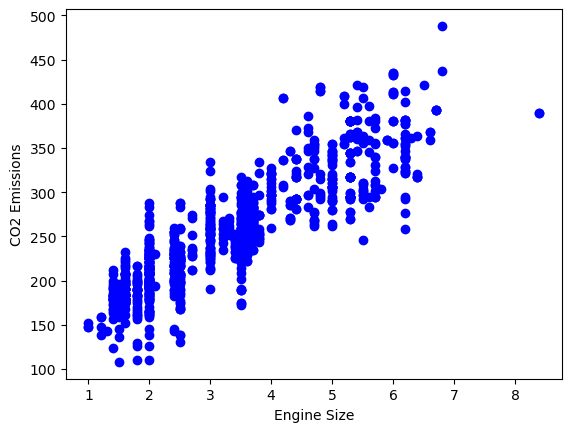

In [25]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

## Multiple Regression Model

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asarray(train[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS']])
y = np.asarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print(f'Coefficients: {regr.coef_}')

Coefficients: [[10.57277064  9.667656    7.39051984]]


In [31]:
# Get your prediction
y_hat = regr.predict(test[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS']])
x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print(f'MSE: {np.mean((y_hat - y)**2)}')
print(f'Variance Score {regr.score(x, y)}')

MSE: 465.5239136161276
Variance Score 0.8824028510813864


### TASK: Try Multiple Linear Regression using: FUELCONSUMPTION_CITY AND FULECONSUMPTION_HWY instead FUELCONSUMPTION_COMB
Does it result in better accuracy?

In [33]:
#x = np.asarray(train[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS']])
#y = np.asarray(train[['CO2EMISSIONS']])
#regr.fit(x, y)
#print(f'Coefficients: {regr.coef_}')

# TODO: Split the data set so it contains the two we needed

## Polynomial Regression

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('../data/FuelConsumptionCo2.csv')

# Split data
msk = np.random.rand(len(df)) < 0.8 # select 80% of data
train = cdf[msk] # 80%
test = cdf[~msk] # 20%

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [38]:
# Create your linear model
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)
# Coefficient
print(f'Coefficient: {clf.coef_}')
print(f'Intercept: {clf.intercept_}')

Coefficient: [[ 0.         49.63193315 -1.36640448]]
Intercept: [108.42578932]


Text(0, 0.5, 'CO2 Emissions')

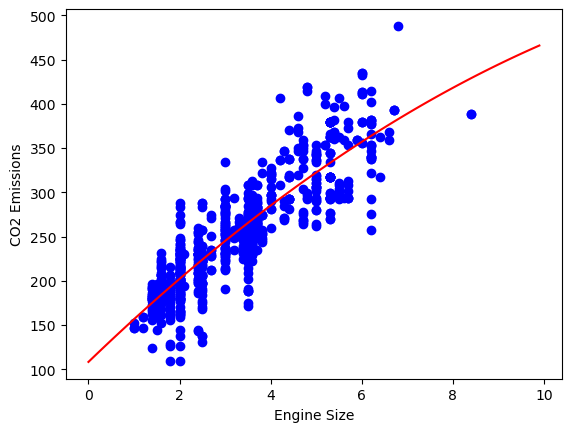

In [40]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] *xx + clf.coef_[0][2] *np.power(xx, 2)
plt.plot(xx,yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')